## Análise Exploratória Departamento Mercado

In [1]:
import pandas as pd 
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats

In [2]:
df = pd.read_csv('vendasMercado.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007 entries, 0 to 4006
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Canal               4007 non-null   object 
 1   Marca               4007 non-null   object 
 2   Origem Tráfego      4007 non-null   object 
 3   MDP                 4007 non-null   object 
 4   Parcelamento        4007 non-null   object 
 5   Receita             4007 non-null   float64
 6   Pedidos             4007 non-null   float64
 7   Mês/Ano             4007 non-null   object 
 8   Custo Parcelamento  4007 non-null   float64
 9   Volume Venda        4007 non-null   float64
dtypes: float64(4), object(6)
memory usage: 313.2+ KB


In [4]:
df.head()

,Canal,Marca,Origem Tráfego,MDP,Parcelamento,Receita,Pedidos,Mês/Ano,Custo Parcelamento,Volume Venda
0,3P,ACOM,BUSCA PPC,AME,A VISTA,5.697485e+05,3983.256299,9/2020,0.0,2.269454e+09
1,1P,ACOM,TRAFEGO DIRETO,PIX,A VISTA,1.448811e+06,39880.373945,10/2021,0.0,5.777913e+10
2,3P,SUBA,TRAFEGO DIRETO,AME,A VISTA,8.944835e+04,669.073494,12/2020,0.0,5.984752e+07
3,3P,ACOM,TRAFEGO DIRETO,BOLETO,A VISTA,1.235274e+05,917.269307,4/2022,0.0,1.133079e+08
4,1P,ACOM,BUSCA ORGANICA,CARTAO,A VISTA,6.339383e+04,1564.373135,2/2020,0.0,9.917161e+07


In [5]:
#Tratando Outliers
z_scores = stats.zscore(df[['Pedidos','Receita']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

new_df.to_csv("VendasMercado_Manipulado.csv",encoding = 'utf-8', index = False)

In [6]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3975 entries, 0 to 4006
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Canal               3975 non-null   object 
 1   Marca               3975 non-null   object 
 2   Origem Tráfego      3975 non-null   object 
 3   MDP                 3975 non-null   object 
 4   Parcelamento        3975 non-null   object 
 5   Receita             3975 non-null   float64
 6   Pedidos             3975 non-null   float64
 7   Mês/Ano             3975 non-null   object 
 8   Custo Parcelamento  3975 non-null   float64
 9   Volume Venda        3975 non-null   float64
dtypes: float64(4), object(6)
memory usage: 341.6+ KB


In [7]:
print('---------------------------Antigo--------------------')
print(df.describe())
print()
print('-----------------------------Novo--------------------')
print(new_df.describe())

---------------------------Antigo--------------------
            Receita       Pedidos  Custo Parcelamento  Volume Venda
count  4.007000e+03  4.007000e+03         4007.000000  4.007000e+03
mean   2.191620e+05  4.599834e+03          284.395278  3.631881e+10
std    9.375611e+05  4.205505e+04         1562.805106  6.083837e+11
min    6.184849e+00  1.162566e+00            0.000000  7.190294e+00
25%    1.489352e+03  1.448440e+01            0.000000  2.073731e+04
50%    1.876860e+04  1.313087e+02            0.000000  2.364005e+06
75%    9.889251e+04  7.361906e+02            0.000000  7.461737e+07
max    2.311184e+07  1.197366e+06        32786.249064  1.991429e+13

-----------------------------Novo--------------------
            Receita        Pedidos  Custo Parcelamento  Volume Venda
count  3.975000e+03    3975.000000         3975.000000  3.975000e+03
mean   1.535250e+05    1799.957924          243.957792  2.060008e+09
std    3.761573e+05    6257.418574         1224.092338  1.217969e+10
min

In [8]:
#normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = new_df.copy()
col = [5,6,8,9]

df_norm.iloc[:,col] = scaler.fit_transform(df_norm.iloc[:,col].to_numpy())


In [9]:
df_norm.head()

,Canal,Marca,Origem Tráfego,MDP,Parcelamento,Receita,Pedidos,Mês/Ano,Custo Parcelamento,Volume Venda
0,3P,ACOM,BUSCA PPC,AME,A VISTA,1.106654,0.348957,9/2020,-0.199322,0.017199
1,1P,ACOM,TRAFEGO DIRETO,PIX,A VISTA,3.443902,6.086409,10/2021,-0.199322,4.575334
2,3P,SUBA,TRAFEGO DIRETO,AME,A VISTA,-0.170367,-0.180750,12/2020,-0.199322,-0.164242
3,3P,ACOM,TRAFEGO DIRETO,BOLETO,A VISTA,-0.079757,-0.141080,4/2022,-0.199322,-0.159852
4,1P,ACOM,BUSCA ORGANICA,CARTAO,A VISTA,-0.239640,-0.037654,2/2020,-0.199322,-0.161013


In [10]:
df_norm.corr()

,Receita,Pedidos,Custo Parcelamento,Volume Venda
Receita,1.000000,0.757982,0.595336,0.708933
Pedidos,0.757982,1.000000,0.237458,0.930922
Custo Parcelamento,0.595336,0.237458,1.000000,0.232086
Volume Venda,0.708933,0.930922,0.232086,1.000000


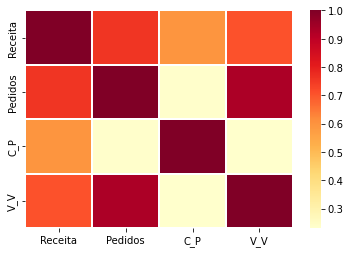

In [20]:
#to BI
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

z_scores = stats.zscore(df[['Pedidos','Receita']])

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
#--------------------------------------#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = new_df.copy()
col = [5,6,8,9]
#--------------------------------------#
df_norm.iloc[:,col] = scaler.fit_transform(df_norm.iloc[:,col].to_numpy())
df_norm.rename(columns={'Custo Parcelamento':'C_P','Volume Venda':'V_V'},inplace = True)
corr = df_norm.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

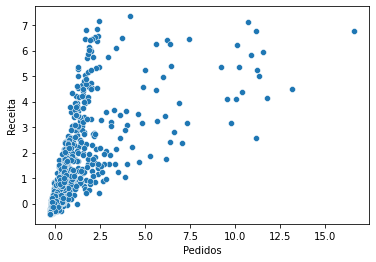

In [12]:
g = sns.scatterplot(x="Pedidos", y="Receita", 
                    data=df_norm)
plt.show()